In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

## 1.0 - Basic Exploratory Data Analysis

In [2]:
df = pd.read_csv('./data/hr_dataset.csv')

In [3]:
pd.set_option("display.max_columns", 62)
df.columns = df.columns.str.strip().str.lower()
df.head()

,id,name,department,geo,role,rising_star,will_relocate,critical,trending perf,talent_level,validated_talent_level,percent_remote,emp_sat_onprem_1,emp_sat_onprem_2,emp_sat_onprem_3,emp_sat_onprem_4,emp_sat_onprem_5,emp_sat_remote_1,emp_sat_remote_2,emp_sat_remote_3,emp_sat_remote_4,emp_sat_remote_5,emp_engagement_1,emp_engagement_2,emp_engagement_3,emp_engagement_4,emp_engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left_company,csr factor,promotion_last_5years,sales,salary,gender,linkedin_hits,emp_work_status2,emp_work_status_3,emp_work_status_4,emp_work_status_5,emp_identity,emp_role,emp_position,emp_title,women_leave,men_leave,emp_competitive_1,emp_competitive_2,emp_competitive_3,emp_competitive_4,emp_competitive_5,emp_collaborative_1,emp_collaborative_2,emp_collaborative_3,emp_collaborative_4,emp_collaborative_5,sensor_stepcount,sensor_heartbeat(average/min),sensor_proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [155]:
# Check duplicated employees identification
df.id.duplicated().sum()

0

In [4]:
pd.set_option("display.max_rows", 62)
df.dtypes

id                                         int64
name                                      object
department                                object
geo                                       object
role                                      object
rising_star                              float64
will_relocate                              int64
critical                                 float64
trending perf                              int64
talent_level                               int64
validated_talent_level                     int64
percent_remote                           float64
emp_sat_onprem_1                         float64
emp_sat_onprem_2                         float64
emp_sat_onprem_3                         float64
emp_sat_onprem_4                         float64
emp_sat_onprem_5                         float64
emp_sat_remote_1                           int64
emp_sat_remote_2                           int64
emp_sat_remote_3                           int64
emp_sat_remote_4    

### 1.1 - Categorical Data Analysis

In [5]:
df.select_dtypes('object').head()
# salary object, not quantitative

,name,department,geo,role,sales,salary,gender
0,BRADDY,Operations,US,VP,sales,low,M
1,BORST,Sales,UK,Senior Director,accounting,low,F
2,BIRDWELL,Finance,France,Senior Director,product_mng,medium,F
3,BENT,Human Resources,China,Senior Director,product_mng,high,M
4,BAZAN,IT,Korea,Director,sales,low,F


In [6]:
df.select_dtypes('object').isnull().sum()

name          2
department    0
geo           0
role          0
sales         0
salary        0
gender        0
dtype: int64

In [7]:
# Relative pay grade (low, medium, high) by role.
df.salary.value_counts() 

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

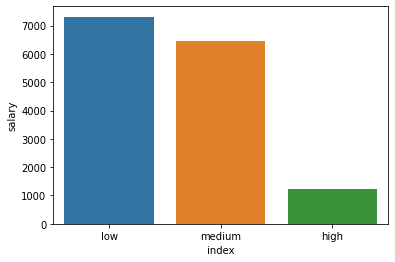

In [8]:
sns.barplot(x='index', y='salary', data=df.salary.value_counts().reset_index())

In [9]:
df.salary.value_counts(normalize=True) * 100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

**Salary category count is skewed to the right  
but this dont say anything about the continuous salary curve.**

In [10]:
df.select_dtypes('object').groupby(['gender', 'salary']).count()[['name']]

name
gender salary      
F      high     613
       low     3683
       medium  3299
M      high     624
       low     3631
       medium  3147

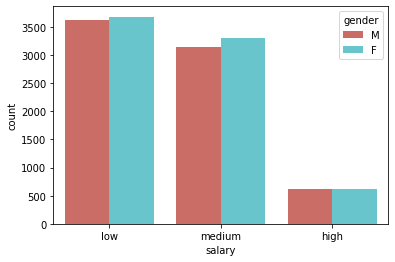

In [11]:
# Salary category count by gender
sns.countplot(x='salary', hue='gender', data=df.select_dtypes('object'), palette='hls')

In [12]:
# The functional department that the employee belongs to.
df.department.value_counts()

IT                 2500
Human Resources    2500
Sales              2500
Finance            2500
Operations         2500
Warehouse          2499
Name: department, dtype: int64

In [13]:
# Employee gender
df.gender.value_counts()

F    7596
M    7403
Name: gender, dtype: int64

In [14]:
# The working geography that the employee belongs to in a matrix organization
df.geo.value_counts()

UK           1772
France       1699
Korea        1685
Japan        1669
China        1667
Colombia     1659
Turkey       1639
US           1632
Australia    1577
Name: geo, dtype: int64

In [15]:
# The employee's position or title.
df.role.value_counts()

Level 2-4          6889
Level 1            3270
Manager            2420
Senior Manager     1320
Director            660
Senior Director     330
VP                  110
Name: role, dtype: int64

In [16]:
df.sales.value_counts()
# What this means?

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

### 1.2 - Quantitative data analysis

In [17]:
df.select_dtypes('number').isnull().sum()

id                                           0
rising_star                              14978
will_relocate                                0
critical                                 14519
trending perf                                0
talent_level                                 0
validated_talent_level                       0
percent_remote                               0
emp_sat_onprem_1                           128
emp_sat_onprem_2                           128
emp_sat_onprem_3                           128
emp_sat_onprem_4                           128
emp_sat_onprem_5                           128
emp_sat_remote_1                             0
emp_sat_remote_2                             0
emp_sat_remote_3                             0
emp_sat_remote_4                             0
emp_sat_remote_5                             0
emp_engagement_1                             0
emp_engagement_2                             0
emp_engagement_3                             0
emp_engagemen

In [18]:
df['emp_sat_onprem_1'].value_counts()

3.0    14871
Name: emp_sat_onprem_1, dtype: int64

Columns with null values description:|
- rising_star: Indicates the level of promise or promote-ability the employee has
- critical: Is the employee critical to the organization?
- men_leave: men who left the company.
- women_leave: Women who left the company.
- csr_factor: What is this? - ignore

**rising_star, critical and csr factor have too much null values, will delete it**

In [19]:
df[['name','men_leave', 'women_leave']]

,name,men_leave,women_leave
0,BRADDY,1.0,NaN
1,BORST,NaN,0.0
2,BIRDWELL,NaN,1.0
3,BENT,1.0,NaN
4,BAZAN,NaN,1.0
...,...,...,...
14994,EARLY,NaN,1.0
14995,LUNSFORD,NaN,1.0
14996,GOLDSMITH,NaN,1.0
14997,FLOOD,1.0,NaN


In [20]:
# NULL Men leave by gender
df[df.men_leave.isnull()].gender.value_counts()

F    7596
M    2538
Name: gender, dtype: int64

In [21]:
# null women leave by gender
df[df.women_leave.isnull()].gender.value_counts()

M    7403
Name: gender, dtype: int64

In [22]:
df[df.men_leave.isnull()][df[df.men_leave.isnull()].women_leave.isnull()].gender.value_counts()
# Only men with both (men and women leave) null

M    2538
Name: gender, dtype: int64

In [23]:
df[df.men_leave.isnull()].gender.value_counts()

F    7596
M    2538
Name: gender, dtype: int64

In [24]:
# Drop useless columns
df.drop(['rising_star', 'critical', 'csr factor'], axis=1, inplace=True)

In [25]:
'rising_star' in df or 'critical' in df or 'csr factor' in df

False

In [26]:
# Get columns with only one value that probably represents nothing
columns_one_value = [column for column in df.select_dtypes('number') if df[column].value_counts().max()==len(df)]

In [27]:
columns_one_value

['trending perf', 'talent_level', 'validated_talent_level']

- Trending Perf : How is the employee trending in performance this year?
- Talent_Level : This field represents a subjective level of management's view of the employee.
- Validated_Talent_Level : This field senior managements view of what the manager stated.

**This fields have subjective and relative analysis from employees, so a unique value says nothing about the data because we can't compare to others.  
"e.g Trending Perf = 3, what this represents, is this good? is this bad? cant know"  
will drop it too**

In [28]:
df.drop(columns_one_value, axis=1, inplace=True)

In [29]:
df.select_dtypes('number').isnull().sum()

id                                           0
will_relocate                                0
percent_remote                               0
emp_sat_onprem_1                           128
emp_sat_onprem_2                           128
emp_sat_onprem_3                           128
emp_sat_onprem_4                           128
emp_sat_onprem_5                           128
emp_sat_remote_1                             0
emp_sat_remote_2                             0
emp_sat_remote_3                             0
emp_sat_remote_4                             0
emp_sat_remote_5                             0
emp_engagement_1                             0
emp_engagement_2                             0
emp_engagement_3                             0
emp_engagement_4                             0
emp_engagement_5                             0
last_evaluation                              0
number_project                               0
average_montly_hours                         0
time_spend_co

In [37]:
# Check indicators
# One indicator from a survey that was sent to employees by a third party. On prem (On premise) means that the employee maintains a high percentage of work on the corporation’s physical work locations.
on_prem_columns = [column for column in df.columns if 'onprem' in column]
df[on_prem_columns].head()

,emp_sat_onprem_1,emp_sat_onprem_2,emp_sat_onprem_3,emp_sat_onprem_4,emp_sat_onprem_5
0,3.0,3.0,4.0,3.0,5.0
1,3.0,3.0,4.0,3.0,5.0
2,3.0,3.0,4.0,3.0,5.0
3,3.0,3.0,4.0,3.0,5.0
4,3.0,3.0,4.0,3.0,5.0


In [31]:
df[on_prem_columns].isnull().sum()

emp_sat_onprem_1    128
emp_sat_onprem_2    128
emp_sat_onprem_3    128
emp_sat_onprem_4    128
emp_sat_onprem_5    128
dtype: int64

In [33]:
for i, column in enumerate(df[on_prem_columns]):
    print('Column {}'.format(i+1))
    print(df[column].value_counts())
    print()

Column 1
3.0    14871
Name: emp_sat_onprem_1, dtype: int64

Column 2
3.0    12878
1.0     1993
Name: emp_sat_onprem_2, dtype: int64

Column 3
4.0    12878
2.0     1993
Name: emp_sat_onprem_3, dtype: int64

Column 4
3.0    12878
1.0     1993
Name: emp_sat_onprem_4, dtype: int64

Column 5
4.0    7737
5.0    5141
1.0    1993
Name: emp_sat_onprem_5, dtype: int64



In [34]:
'''
Replace nulll emp_sat_onprem with value with more occurrences
Using this approach because have no info about this data like range or if this represents a categorical data encoded in numbers.
Also the most columns is unbalanced 
'''
for i, column in enumerate(df[on_prem_columns]):
    df[column].replace(np.nan, df[column].value_counts().sort_values(ascending=False).index[0], inplace=True)

In [40]:
# Remote sat indicators
on_remote_columns = [column for column in df.columns if 'sat_remote' in column]

In [43]:
df[on_remote_columns].isnull().sum()

emp_sat_remote_1    0
emp_sat_remote_2    0
emp_sat_remote_3    0
emp_sat_remote_4    0
emp_sat_remote_5    0
dtype: int64

In [45]:
for i, column in enumerate(df[on_remote_columns]):
    print('Column {}'.format(i+1))
    print(df[column].value_counts())
    print()

Column 1
3    9088
2    4742
5    1169
Name: emp_sat_remote_1, dtype: int64

Column 2
5    10257
3     4742
Name: emp_sat_remote_2, dtype: int64

Column 3
4    10257
2     4742
Name: emp_sat_remote_3, dtype: int64

Column 4
4    9088
3    4742
5    1169
Name: emp_sat_remote_4, dtype: int64

Column 5
5    9088
2    4742
4    1169
Name: emp_sat_remote_5, dtype: int64



In [47]:
# Engagement indicators
# Indicator from a survey that was sent to employees by a third party. Engagement represents the employee's feeling about how they feel about being engaged in company activities.

engagement_columns = [column for column in df.columns if 'engagement' in column]

In [50]:
df[engagement_columns].isnull().sum()

emp_engagement_1    0
emp_engagement_2    0
emp_engagement_3    0
emp_engagement_4    0
emp_engagement_5    0
dtype: int64

In [49]:
for i, column in enumerate(df[engagement_columns]):
    print('Column {}'.format(i+1))
    print(df[column].value_counts())
    print()

Column 1
5    11428
1     3571
Name: emp_engagement_1, dtype: int64

Column 2
5    11428
2     3571
Name: emp_engagement_2, dtype: int64

Column 3
4    11428
3     3571
Name: emp_engagement_3, dtype: int64

Column 4
4    11428
2     3571
Name: emp_engagement_4, dtype: int64

Column 5
3    11428
1     3571
Name: emp_engagement_5, dtype: int64



In [52]:
df.last_evaluation # *interesting metric to predict

0        0.36
1        0.36
2        0.36
3        0.36
4        0.36
         ... 
14994    1.00
14995    1.00
14996    1.00
14997    1.00
14998    1.00
Name: last_evaluation, Length: 14999, dtype: float64

In [66]:
df.last_evaluation.describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

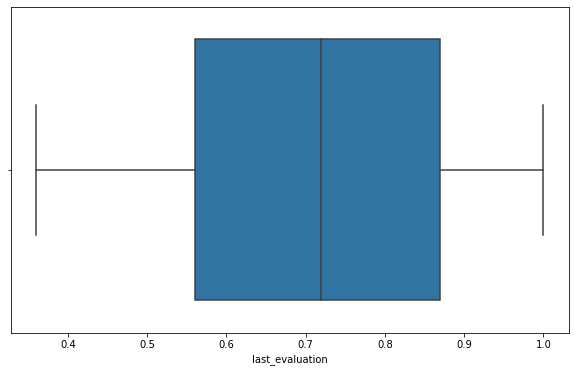

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(df.last_evaluation)

In [76]:
print('Median', df.last_evaluation.median())
print('Mean', df.last_evaluation.mean())
print('Mode', df.last_evaluation.mode())

Median 0.72
Mean 0.7161017401160078
Mode 0    0.55
dtype: float64


**Distribution not totally simetric becaus mode << mean and median  
but mean and median are almost equal**

In [97]:
stats.skew(df.last_evaluation)
# little skewed to the left

-0.02661908743732169

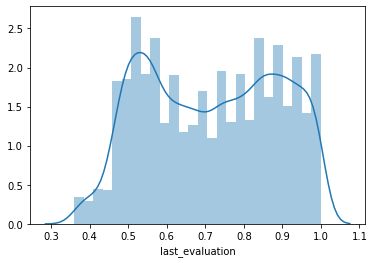

In [115]:
sns.distplot(df.last_evaluation)

In [121]:
df.number_project.value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [125]:
df.time_spend_company.value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [127]:
# The number of accidents the employee is involved in.
df.work_accident.value_counts()

0    12830
1     2169
Name: work_accident, dtype: int64

In [130]:
# Did the employee leave the company? interesting target?
df.left_company.value_counts()

0    11428
1     3571
Name: left_company, dtype: int64

In [132]:
# Did the employee get promoted in last 5 years?
df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [136]:
# The number of times employee visits LinkedIn networking sites.
df.linkedin_hits.describe()

count    14999.000000
mean        18.553904
std         18.987335
min          1.000000
25%          5.000000
50%          9.000000
75%         31.000000
max         65.000000
Name: linkedin_hits, dtype: float64

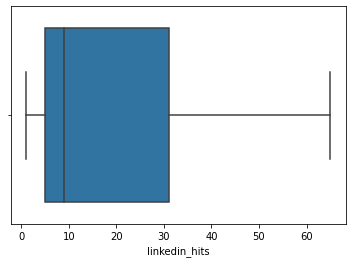

In [139]:
sns.boxplot(df.linkedin_hits)

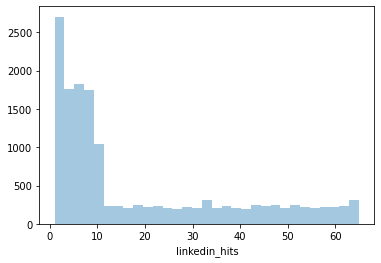

In [143]:
sns.distplot(df.linkedin_hits, kde=False)

In [299]:
stats.skew(df.linkedin_hits)
# skewed to the right

1.072667749861693

In [146]:
'''
Indicator: emp_work_status
One indicator from a survey that was sent to employees by a third party. Status represents how strongly employee feels about their status level in the organization.
'''
emp_work_columns = [column for column in df.columns if 'emp_work_status' in column]

In [150]:
df[emp_work_columns].isnull().sum()

emp_work_status2     0
emp_work_status_3    0
emp_work_status_4    0
emp_work_status_5    0
dtype: int64

In [149]:
for i, column in enumerate(df[emp_work_columns]):
    print('Column {}'.format(i+1))
    print(df[column].value_counts())
    print()

Column 1
3    3030
4    3010
1    3008
5    2995
2    2956
Name: emp_work_status2, dtype: int64

Column 2
3    3057
5    3050
1    3013
4    3011
2    2868
Name: emp_work_status_3, dtype: int64

Column 3
1    3044
4    3026
5    3023
3    3009
2    2897
Name: emp_work_status_4, dtype: int64

Column 4
4    3064
2    3001
1    2990
5    2980
3    2964
Name: emp_work_status_5, dtype: int64



In [168]:
# How the employee identifies themselves with the company.
df.emp_identity.value_counts()

2    6396
1    4425
4    2067
3    1961
5     150
Name: emp_identity, dtype: int64

In [160]:
df.emp_identity.isnull().sum()

0

In [163]:
# How the employee identifies themselves with the importance of their role in the company.
df.emp_role.value_counts()

2    6490
1    4498
3    1937
4    1917
5     157
Name: emp_role, dtype: int64

In [164]:
df.emp_role.isnull().sum()

0

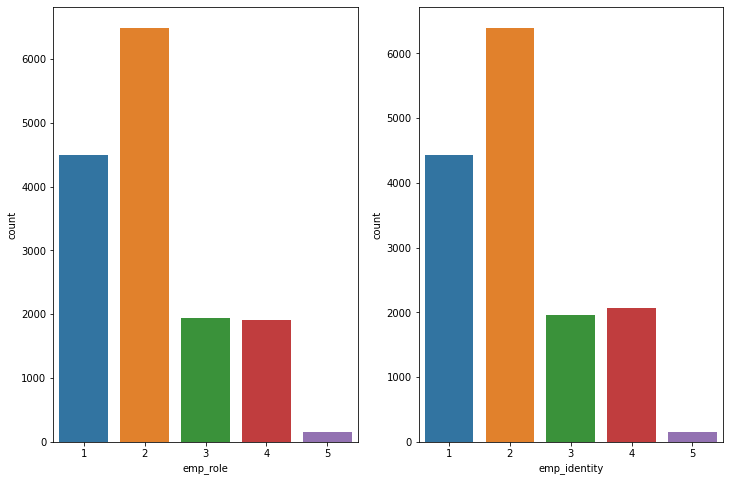

In [184]:
f, axs = plt.subplots(ncols=2, figsize=(12,8))
sns.countplot(df.emp_role, ax=axs[0])
sns.countplot(df.emp_identity, ax=axs[1])

In [196]:
df[df.emp_role==df.emp_identity][['emp_role', 'emp_identity']]

,emp_role,emp_identity
0,1,1
2,1,1
4,1,1
6,1,1
7,2,2
...,...,...
14989,2,2
14990,1,1
14991,2,2
14996,1,1


In [194]:
len(df[df.emp_role==df.emp_identity][['emp_role', 'emp_identity']]) / len(df) 

0.42942862857523834

**employees that answeer the same on emp_identity and emp_role represents 42% of full dataset  
they identify themselves equally with the company and the role**

In [198]:
len(df[df.emp_role>df.emp_identity][['emp_role', 'emp_identity']]) / len(df)

0.2801520101340089

**28% identify more with the importance of their role in the company but less with the company itself**

In [199]:
len(df[df.emp_role<df.emp_identity][['emp_role', 'emp_identity']]) / len(df)

0.29041936129075274

**29% identify more with the company than with the importance of their role**

In [205]:
'''
Indicator: emp_competitive
Indicator from a survey that was sent to employees by a third party. How employee feels about the competitive nature of work in the organization.
'''

2    6447
1    4353
4    2178
3    1863
5     158
Name: emp_competitive_1, dtype: int64

In [206]:
emp_competitive_columns = [column for column in df.columns if 'emp_competitive' in column]

In [210]:
df[emp_competitive_columns].isnull().sum()

emp_competitive_1    0
emp_competitive_2    0
emp_competitive_3    0
emp_competitive_4    0
emp_competitive_5    0
dtype: int64

In [211]:
for i, column in enumerate(df[emp_competitive_columns]):
    print('Column {}'.format(i+1))
    print(df[column].value_counts())
    print()

Column 1
2    6447
1    4353
4    2178
3    1863
5     158
Name: emp_competitive_1, dtype: int64

Column 2
2    3045
1    3042
5    2979
4    2979
3    2954
Name: emp_competitive_2, dtype: int64

Column 3
2    6318
1    4470
4    2121
3    1941
5     149
Name: emp_competitive_3, dtype: int64

Column 4
2    3079
4    3067
3    2976
1    2939
5    2938
Name: emp_competitive_4, dtype: int64

Column 5
3    3063
2    3030
1    3016
5    2978
4    2912
Name: emp_competitive_5, dtype: int64



In [215]:
'''
Indicator : emp_collaborative
Indicator from a survey that was sent to employees by a third party. How employee feels about the collaborative nature of work in the organization.
'''

emp_collaborative_columns = [column for column in df.columns if 'emp_collaborative' in column]

In [218]:
df[emp_collaborative_columns].isnull().sum()

emp_collaborative_1    0
emp_collaborative_2    0
emp_collaborative_3    0
emp_collaborative_4    0
emp_collaborative_5    0
dtype: int64

In [228]:
for i, column in enumerate(df[emp_collaborative_columns]):
    print('Column {}'.format(i+1))
    print(df[column].value_counts())
    print()

Column 1
2    3072
1    3038
3    2982
4    2973
5    2934
Name: emp_collaborative_1, dtype: int64

Column 2
1    7072
2    7035
4     460
5     432
Name: emp_collaborative_2, dtype: int64

Column 3
3    3020
2    3020
4    3012
1    2977
5    2970
Name: emp_collaborative_3, dtype: int64

Column 4
3    3053
4    3008
5    2992
2    2978
1    2968
Name: emp_collaborative_4, dtype: int64

Column 5
4    3092
2    3044
5    3024
1    2921
3    2918
Name: emp_collaborative_5, dtype: int64



In [234]:
# Sentient devices are used to capture certain employee activities. In this case number of steps.
df.sensor_stepcount.isnull().sum()

0

In [244]:
df.sensor_stepcount.describe()

count    14999.000000
mean      3406.693246
std       1755.742272
min       1000.000000
25%       1704.500000
50%       3376.000000
75%       4893.000000
max       8500.000000
Name: sensor_stepcount, dtype: float64

In [248]:
# Sentient devices are used to capture certain employee activities. In this case heartbeat.
df['sensor_heartbeat(average/min)'].describe()

count    14999.000000
mean        77.967198
std          7.252848
min         60.000000
25%         75.000000
50%         78.000000
75%         85.000000
max         90.000000
Name: sensor_heartbeat(average/min), dtype: float64

In [249]:
df['sensor_heartbeat(average/min)'].isnull().sum()

0

In [251]:
# Sentient devices are used to capture certain employee activities. In this case how close they are to their company laptop.
df['sensor_proximity(1-highest/10-lowest)'].describe()

count    14999.000000
mean         6.399360
std          2.588091
min          1.000000
25%          5.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: sensor_proximity(1-highest/10-lowest), dtype: float64

**what this sensors information really means?**

____________________________________________________________________________________

## 2.0 - Basic Data Cleaning

In [254]:
df.select_dtypes('object')

,name,department,geo,role,sales,salary,gender
0,BRADDY,Operations,US,VP,sales,low,M
1,BORST,Sales,UK,Senior Director,accounting,low,F
2,BIRDWELL,Finance,France,Senior Director,product_mng,medium,F
3,BENT,Human Resources,China,Senior Director,product_mng,high,M
4,BAZAN,IT,Korea,Director,sales,low,F
...,...,...,...,...,...,...,...
14994,EARLY,Operations,Korea,Level 2-4,technical,medium,F
14995,LUNSFORD,Sales,Australia,Level 2-4,technical,medium,F
14996,GOLDSMITH,Finance,China,Level 2-4,sales,low,F
14997,FLOOD,Human Resources,US,Level 2-4,accounting,medium,M


**Will drop the columns that are probably not significant for future analysis**
- name (will use only id for identification)
- sales (no info about this column)
- sensor_stepcount
- sensor_heartbeat(average/min)
- sensor_proximity(1-highest/10-lowest)

this data can be included in the future on feature engineering and model tunning

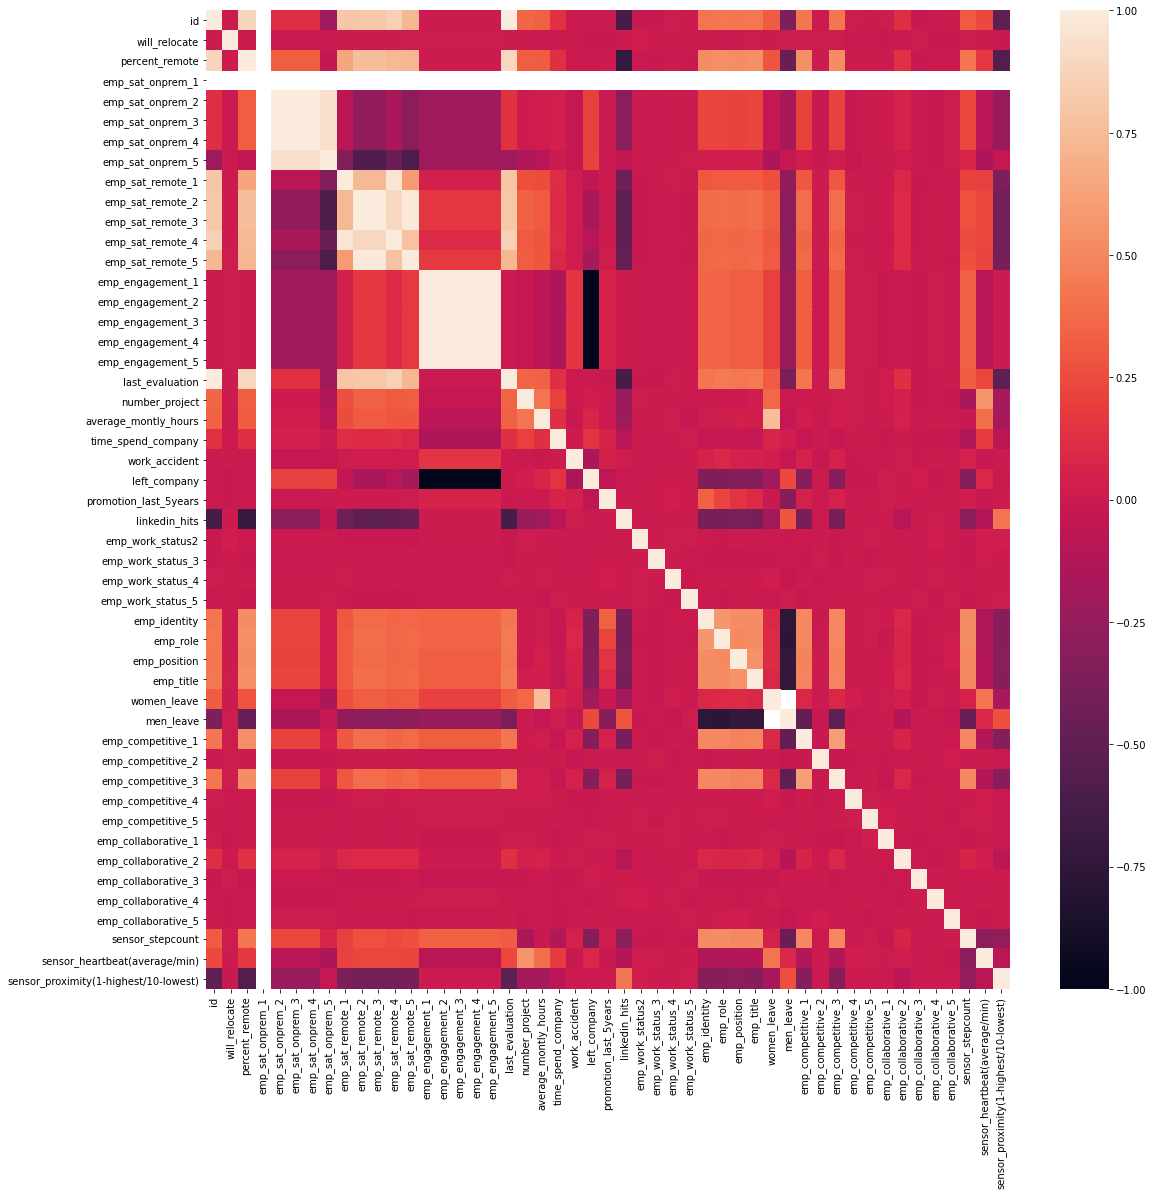

In [286]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr())

In [293]:
drop_columns = ['name', 'sales', 'sensor_stepcount', 'sensor_heartbeat(average/min)', 'sensor_proximity(1-highest/10-lowest)']
df.drop(drop_columns, axis=1, inplace=True)

In [295]:
df.to_csv('./data/dataset_cleaned_1.csv')